<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

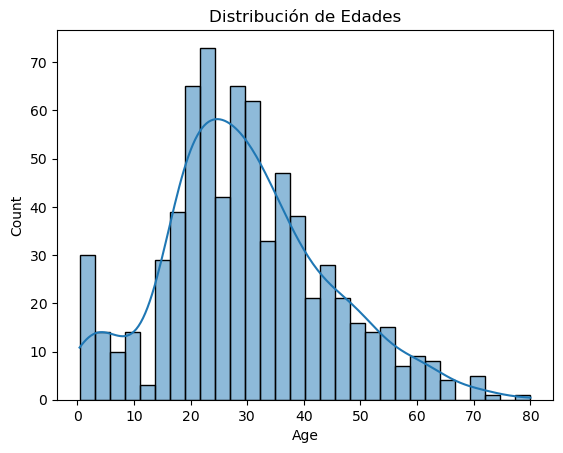

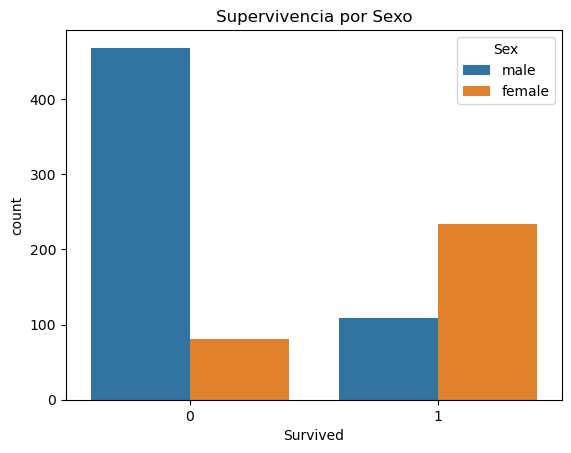

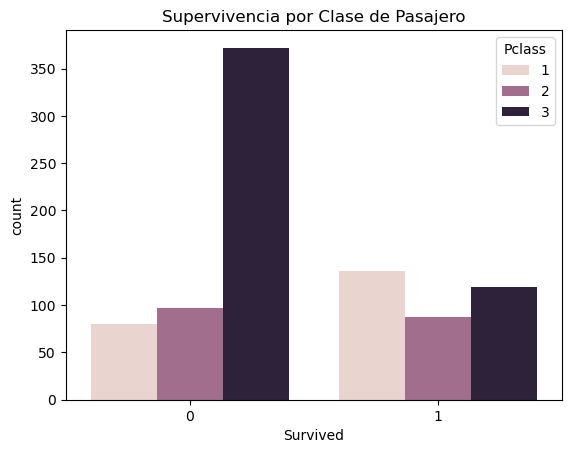

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
df = pd.read_csv('Titanic-Dataset.csv')  # Asegúrate de que el archivo está en la misma carpeta que tu notebook
df.head()

# Mostrar información general del dataset
print(df.info())

# Estadísticas descriptivas
print(df.describe())

# Visualizar la distribución de edades
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title('Distribución de Edades')
plt.show()

# Relación entre supervivencia y sexo
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Supervivencia por Sexo')
plt.show()

# Relación entre supervivencia y clase de pasajero
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Supervivencia por Clase de Pasajero')
plt.show()

In [9]:
# Rellenar valores faltantes en la columna 'Age' con la mediana df['Age'] = df['Age'].fillna(df['Age'].median()) # Rellenar valores faltantes en la columna 'Embarked' con el modo df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0]) # Eliminar la columna 'Cabin' debido a muchos valores faltantes df.drop(columns=['Cabin'], inplace=True) # Convertir las variables categóricas en variables dummy df = pd.get_dummies(df, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True

In [12]:
# Selección de características relevantes
features = ['Age', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'Pclass_2', 'Pclass_3']
X = df[features]
y = df['Survived']


In [14]:
from sklearn.model_selection import train_test_split

# División del dataset en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
from sklearn.linear_model import LogisticRegression

# Entrenar el modelo
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       105
           1       0.76      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



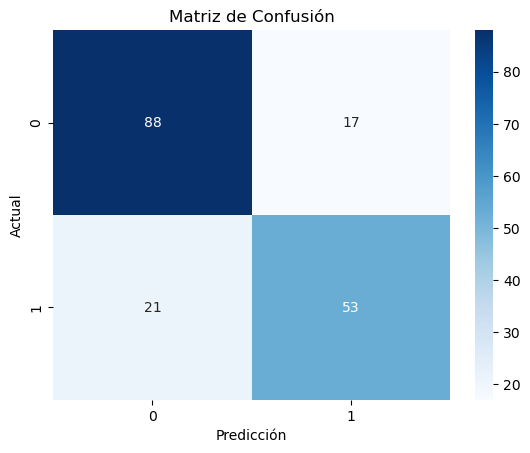

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

# Predicciones
y_pred = model.predict(X_test)

# Evaluación del desempeño
print(classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.show()


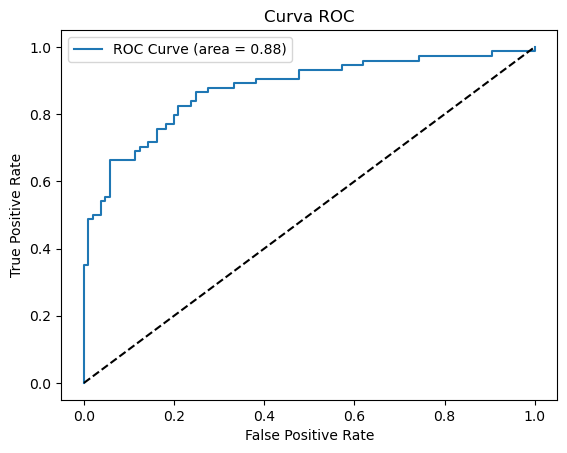

In [20]:
# Gráfica de la curva ROC
from sklearn.metrics import roc_curve, roc_auc_score

y_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='best')
plt.show()
